Student Number: 13443783

**Question 1: What’s the probability that she gets 13 out of 20 cups right, assuming she has no special ability?**

In [ ]:
import numpy as np

all_trials = []

for j in range(100000):
  trial = []
  for i in range(20):
    cup = np.random.random() < 0.5
    trial.append(cup)
  correct = sum(trial)
  all_trials.append(correct)

accumulator = 0
for i in all_trials:
  if i == 13:
    accumulator += 1

accumulator / 100000
  

0.07374

The probability of getting 13 out of 20 seems to be around 0.074. The calculated value falls around that value everytime the program is run.

**Questions 2: Interpret the p-value. Should we reject the null hypothesis?**

The p-value that was calculated above (0.07) is higher than 0.05. This means that the results are not statistically significant meaning that there is strong support for the null hypothesis. So we should not reject the null hypothesis. 

**Question 3: Now suppose we run the experiment with 30 cups of tea and she gets 22 cups.
Again, assume the Lady has no special ability. What’s the p-value now?** 

In [ ]:
import numpy as np

all_trials = []

for j in range(100000):
  trial = []
  for i in range(30):
    cup = np.random.random() < 0.5
    trial.append(cup)
  correct = sum(trial)
  all_trials.append(correct)

accumulator = 0
for i in all_trials:
  if i == 22:
    accumulator += 1

accumulator / 100000

0.00521

The p-value now seems to be around 0.005. Since the p-value is now less than 0.05 we can reject the null hypothesis.

**Question 4: Build and plot a posterior distribution for the value of 𝑝, the probability she will guess a cup correctly.**

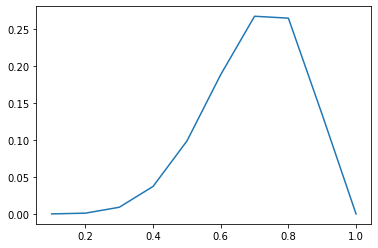

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

p_grid = np.linspace(.1,1,10) 
prior_distribution = [1/10] * 10
likelihoods = stats.binom.pmf(6, 8, p=p_grid)
posterior = likelihoods * prior_distribution
posterior = posterior / sum(posterior)
plt.plot(p_grid,posterior)
plt.show()

Based on the fact that the question indicates that getting it right 60-80% of the time is weird, this plot seems to be correct. It shows a peak exactly at that 60-80% range.

**Question 5: Construct and plot a prior that reflects these considerations. Rerun the estimation using this new prior and plot the posterior.**

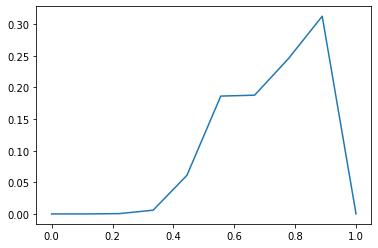

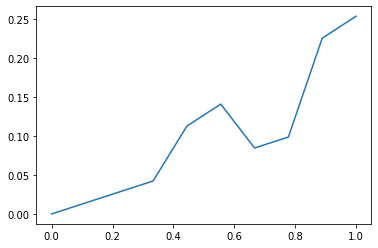

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

hardcodedValues = [1, 1, 1, 1, 2, 2, 1, 1, 2, 2]
newList = []
for i in hardcodedValues:
  newList.append(i/sum(hardcodedValues))

grain = 10
p_grid = np.linspace(0,1,grain)
prior_distribution = p_grid * newList
prior_distribution = prior_distribution / sum(prior_distribution) 

likelihoods = stats.binom.pmf(6, 8, p=p_grid)
posterior = likelihoods * prior_distribution
posterior = posterior / sum(posterior)
plt.plot(p_grid,posterior)
plt.show()

plt.plot(p_grid, prior_distribution)
plt.show()

**Question 6: What’s the likelihood of the data, assuming there is no difference in walking
speeds between the groups?**

In [ ]:
from scipy import stats

group1 = [9.61, 7.11, 7.88, 7.38, 7.18, 8.51, 8.68, 7.86, 9.02, 6.96, 8.13, 9.27, 8.32, 9.79]
group2 = [7.30, 7.91, 7.53, 7.16, 6.52, 5.85, 8.45, 6.92, 7.46, 6.59, 9.26, 5.78, 7.67, 7.22]

stats.ttest_ind(group1, group2)

Ttest_indResult(statistic=2.8476382149779207, pvalue=0.00849145457175489)

The likelihood of the data, assuming there is no difference in walking speeds between the groups is roughly **0.0085**. Reason for using an independent t-test: we are trying to understand whether one group that was exposed to certain words associated with the elderly walked slower than the other group. We are basically determining whether there is a statistically significant difference between the walking speed means in the two basically unrelated groups. I would not have used an independent t-test if it was the same group of individuals coming in on different days doing both the neutral words and elderly associated word trials.

**Question: Add one data point to each group and recalculate the p-value**

In [ ]:
from scipy import stats

group1 = [9.61, 7.11, 7.88, 7.38, 7.18, 8.51, 8.68, 7.86, 9.02, 6.96, 8.13, 9.27, 8.32, 9.79]
group2 = [7.30, 7.91, 7.53, 7.16, 6.52, 5.85, 8.45, 6.92, 7.46, 6.59, 9.26, 5.78, 7.67, 7.22]

# A realistic possible walking speed for the missing person might be the avg of everyone else in that group
# Get data point to add to group 1
P1Speed = 0;
for i in group1:
  P1Speed += i
group1.append(P1Speed/len(group1))

# Get data point to add to group 2
P2Speed = 0;
for i in group2:
  P2Speed += i
group2.append(P2Speed/len(group2))

stats.ttest_ind(group1, group2)


Ttest_indResult(statistic=3.0588541224431833, pvalue=0.004853728116802296)

The p-value after introducing two new people is roughly 0.0049

**Question 7: Find a plausible lower limit and a plausible upper limit on the p value for
this experiment. Explain your approach to selecting the missing data points.**

Plausible Lower Limit: 0.0049

Plausible Upper Limit: 0.0085

Approach to selecting the missing data points: The missing data point can't be something that is drastically different from the group that it is missing from. So based on that assumption, I took the average values of all individuals in group 1 and used that value as the walking speed of the missing person. I did the same thing for the missing data point in group 2 as well. The average value produces a nice realistic and representative value.